In [1]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install --upgrade scipy networkx
#!pip install dgl -f https://data.dgl.ai/wheels/repo.html
#!pip install dgl-cu111 dglgo -f https://data.dgl.ai/wheels/repo.html
#!pip install dive-into-graphs
#!pip install pydig

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os, pkgutil
__all__ = list(module for _, module, _ in pkgutil.iter_modules([os.path.dirname('/content/drive/MyDrive/Explainability Methods/Models/Script/Layers/')]))
print(__all__)

['Batched_DIFFPOOL_Assignment', 'Batched_DIFFPOOL_Embedding', 'Batched_DIFFPOOL_Layer', 'Batched_GraphSage_Layer', 'DGCNN_layer', 'DIFFPOOL_Assignment_Layer', 'DIFFPOOL_Embedding_Layer', 'DIFFPOOL_Layer', 'GIN_MLP_Layers', 'GraphSage_Layer', 'MLP_DGCNN', 'SortPooling_Layer', 'matrix_util']


In [4]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

from termcolor import colored
from torch._C import dtype

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv
import torch_geometric.nn as gnn
import torch.nn.functional as F
from torch.nn import Linear
from sklearn.model_selection import train_test_split
import numpy as np
from torch_geometric.loader import DataLoader
from torch_geometric.nn import global_mean_pool
from torch_geometric.datasets import TUDataset
from torch_geometric.data.batch import Batch
from torch import Tensor
from torch_geometric.typing import OptPairTensor, Adj, OptTensor, Size
from typing import Callable, Union, Tuple
from torch_sparse import SparseTensor
from sklearn import metrics
from copy import deepcopy
from scipy.spatial.distance import hamming
from time import perf_counter
import csv
from torch.nn.modules import activation
import random
import pandas
import statistics


from termcolor import colored
from torchsummary import summary
from torch.autograd import Variable
from keras import backend as K
from statistics import mean
from operator import add
import tensorflow as tf
from torch_geometric.utils import dropout
from torch_geometric.loader import DataLoader
import torch
import torch.nn as nn
from torch.autograd import Variable
import math
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch_geometric.utils.convert import to_scipy_sparse_matrix
from torch_geometric.utils.train_test_split_edges import torch_geometric
import networkx as nx
import numpy as np
from torch_geometric.nn import GCNConv
import sys
from torch_geometric.datasets import TUDataset
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/Layers/'
sys.path.insert(0,py_path)
#import GraphSage_Layer as graphsage_layer
import Batched_GraphSage_Layer as batched_graphsage_layer
import Batched_DIFFPOOL_Assignment as batched_diffpool_assignment
import Batched_DIFFPOOL_Embedding as batched_diffpool_embedding
import Batched_DIFFPOOL_Layer as batched_diffpool_layer
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)
import DIFFPOOL as diffpool


In [5]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [6]:
df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]


In [7]:
torch.manual_seed(123456)

#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=100, shuffle=True)
#train_dataset = dataset[:150]
#test_dataset = dataset[150:]

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38


In [8]:
BATCH_SIZE = 10

torch.manual_seed(123456)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [79]:
GNN_Model = diffpool.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=1, embedding_hid_dim=64, new_feature_size=64,
                                    assignment_input_dim=7, assignment_num_block_layers=1, assignment_hid_dim=64, max_number_of_nodes=256,
                                    prediction_hid_layers=[50], concat_neighborhood=False, num_classes=2, Weight_Initializer=3,
                                    Bias=True, dropout_rate=0, normalize_graphsage=False, aggregation="mean",
                                    act_fun="ReLu", concat_diffpools_outputs=True, num_pooling=1, pooling="mean")

ReLu is Selected.


In [80]:
print(GNN_Model)

DIFFPOOL_Model(
  (diffpool_layers): Sequential(
    (0): Batched_DiffPool_Layer(
      (diffpool_embedding): Batched_DiffPool_Embedding_Layer(
        (DiffPool_Embedding): ModuleList(
          (0): GNN_Batched_GraphSage_Layer(
            (learnable_weights): Linear(in_features=7, out_features=64, bias=True)
          )
          (1-2): 2 x GNN_Batched_GraphSage_Layer(
            (learnable_weights): Linear(in_features=64, out_features=64, bias=True)
          )
        )
      )
      (diffpool_assignment): Batched_DiffPool_Assignment_Layer(
        (diffPool_assignment): ModuleList(
          (0): GNN_Batched_GraphSage_Layer(
            (learnable_weights): Linear(in_features=7, out_features=64, bias=True)
          )
          (1-2): 2 x GNN_Batched_GraphSage_Layer(
            (learnable_weights): Linear(in_features=64, out_features=64, bias=True)
          )
        )
      )
    )
  )
  (last_extra_embedding): Batched_DiffPool_Embedding_Layer(
    (DiffPool_Embedding): Modul

In [ ]:
diffpool_layer_1_weights_before_training = deepcopy(GNN_Model.diffpool_layer_1.new_embed.embedding_layer.learnable_weights.weight)
diffpool_layer_2_weights_before_training = deepcopy(GNN_Model.diffpool_layer_2.new_embed.embedding_layer.learnable_weights.weight)
lin1_weights_before_training = deepcopy(GNN_Model.lin1.weight)
lin2_weights_before_training = deepcopy(GNN_Model.lin2.weight)
lin3_weights_before_training = deepcopy(GNN_Model.lin3.weight)

In [81]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=0.0001, weight_decay=1e-6)

In [82]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch


In [83]:
def visualize_losses(gcn_losses, epoch_history):
    gcn_losses_list = torch.stack(gcn_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("`DiffPool Model Loss in Epoch: " + str(epoch_history))
    ax.plot(gcn_losses_list, color='r')

    #plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()

In [84]:
def train_step():
    GNN_Model_loss_batch = []
    LRP_Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_loader:
        #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        concatination_list_of_poolings, prediction_output = GNN_Model(batch_of_graphs, None)
        #print("prediction_output: ", prediction_output)
        #print("concatination_list_of_poolings: ", concatination_list_of_poolings)
        pred = prediction_output.argmax(dim=1)
        LRP_Pred_Labels.extend(pred.detach().tolist())
        Real_Labels.extend(batch_of_graphs.y.detach().tolist())

        batch_loss = loss_calculations(prediction_output, batch_of_graphs.y)
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, LRP_Pred_Labels)

In [85]:
LOSS_Visualization_Parameter = 50
Model_Saving_Parameter = 100

In [86]:
Model_training_time_per_epoch = []
Model_training_Acc_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        start_generation = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        Model_training_time_per_epoch.append(perf_counter() - start_generation)
        Model_training_Acc_per_epoch.append(training_acc)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')


        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)

        #break

        if (epoch + load_index + 1) % LOSS_Visualization_Parameter == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        #if (epoch + load_index + 1) % Model_Saving_Parameter == 0 and epoch > 0:
        #    torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/"+str(Explainability_name)+" on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")


Epoch: 001, Model Loss: 0.6931
Epoch: 002, Model Loss: 0.6675
Epoch: 003, Model Loss: 0.6505
Epoch: 004, Model Loss: 0.6398
Epoch: 005, Model Loss: 0.6291
Epoch: 006, Model Loss: 0.6320
Epoch: 007, Model Loss: 0.6230
Epoch: 008, Model Loss: 0.6222
Epoch: 009, Model Loss: 0.6227
Epoch: 010, Model Loss: 0.6229
Epoch: 011, Model Loss: 0.6151
Epoch: 012, Model Loss: 0.6173
Epoch: 013, Model Loss: 0.6148
Epoch: 014, Model Loss: 0.6118
Epoch: 015, Model Loss: 0.6159
Epoch: 016, Model Loss: 0.6057
Epoch: 017, Model Loss: 0.5946
Epoch: 018, Model Loss: 0.5864
Epoch: 019, Model Loss: 0.5722
Epoch: 020, Model Loss: 0.5633
Epoch: 021, Model Loss: 0.5455
Epoch: 022, Model Loss: 0.5325
Epoch: 023, Model Loss: 0.5974
Epoch: 024, Model Loss: 0.6470
Epoch: 025, Model Loss: 0.6493
Epoch: 026, Model Loss: 0.6436
Epoch: 027, Model Loss: 0.6424
Epoch: 028, Model Loss: 0.6432
Epoch: 029, Model Loss: 0.6417
Epoch: 030, Model Loss: 0.6412
Epoch: 031, Model Loss: 0.6429
Epoch: 032, Model Loss: 0.6418
Epoch: 0

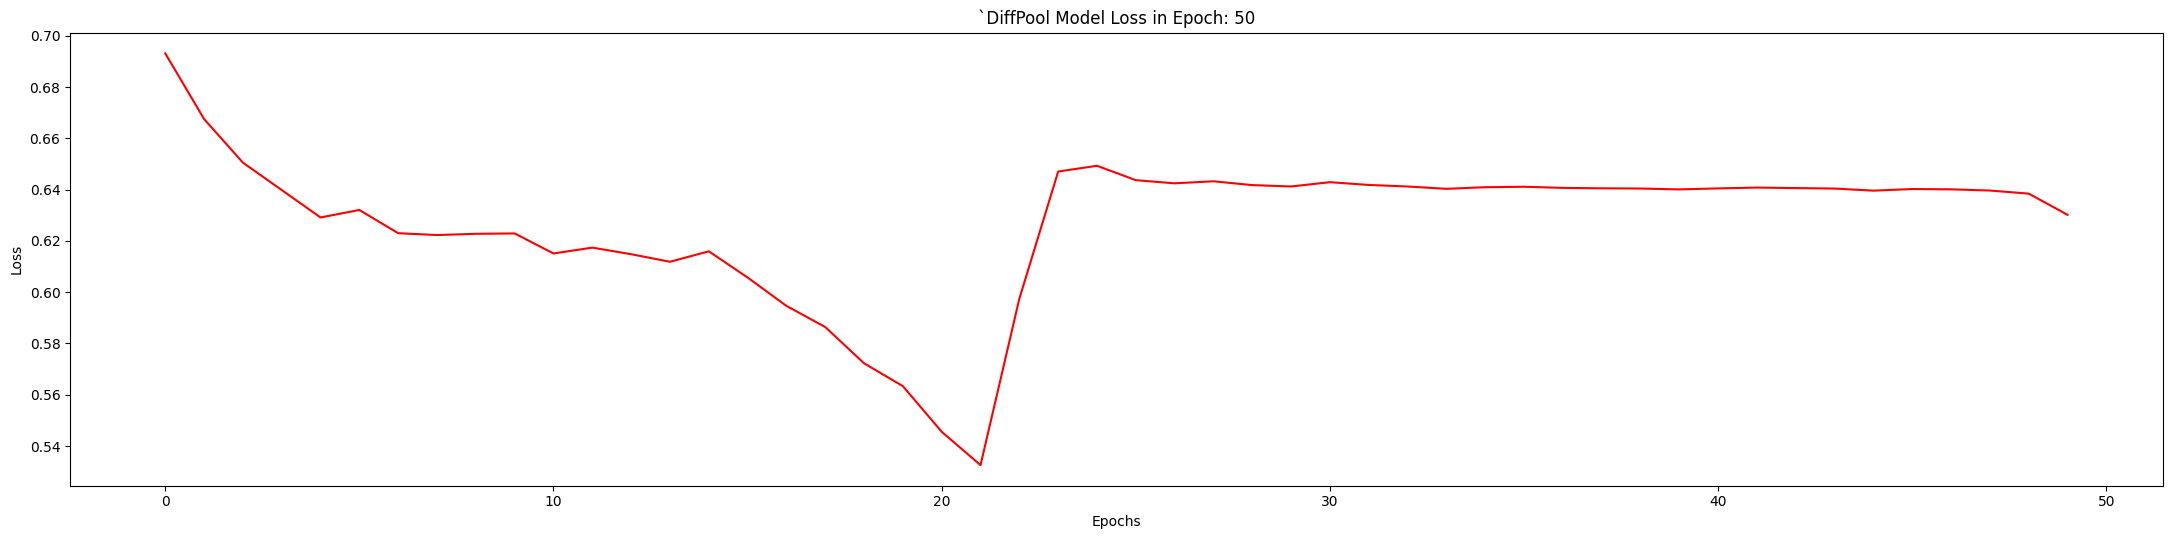

Epoch: 051, Model Loss: 0.5919
Epoch: 052, Model Loss: 0.5750
Epoch: 053, Model Loss: 0.6369
Epoch: 054, Model Loss: 0.6397
Epoch: 055, Model Loss: 0.6399
Epoch: 056, Model Loss: 0.6395
Epoch: 057, Model Loss: 0.6400
Epoch: 058, Model Loss: 0.6397
Epoch: 059, Model Loss: 0.6399
Epoch: 060, Model Loss: 0.6394
Epoch: 061, Model Loss: 0.6392
Epoch: 062, Model Loss: 0.6393
Epoch: 063, Model Loss: 0.6389
Epoch: 064, Model Loss: 0.6379
Epoch: 065, Model Loss: 0.6371
Epoch: 066, Model Loss: 0.6332
Epoch: 067, Model Loss: 0.6140
Epoch: 068, Model Loss: 0.5450
Epoch: 069, Model Loss: 0.5841
Epoch: 070, Model Loss: 0.6197
Epoch: 071, Model Loss: 0.6324
Epoch: 072, Model Loss: 0.6042
Epoch: 073, Model Loss: 0.5538
Epoch: 074, Model Loss: 0.5672
Epoch: 075, Model Loss: 0.5271
Epoch: 076, Model Loss: 0.4958
Epoch: 077, Model Loss: 0.4917
Epoch: 078, Model Loss: 0.5333
Epoch: 079, Model Loss: 0.5079
Epoch: 080, Model Loss: 0.5363
Epoch: 081, Model Loss: 0.6072
Epoch: 082, Model Loss: 0.5305
Epoch: 0

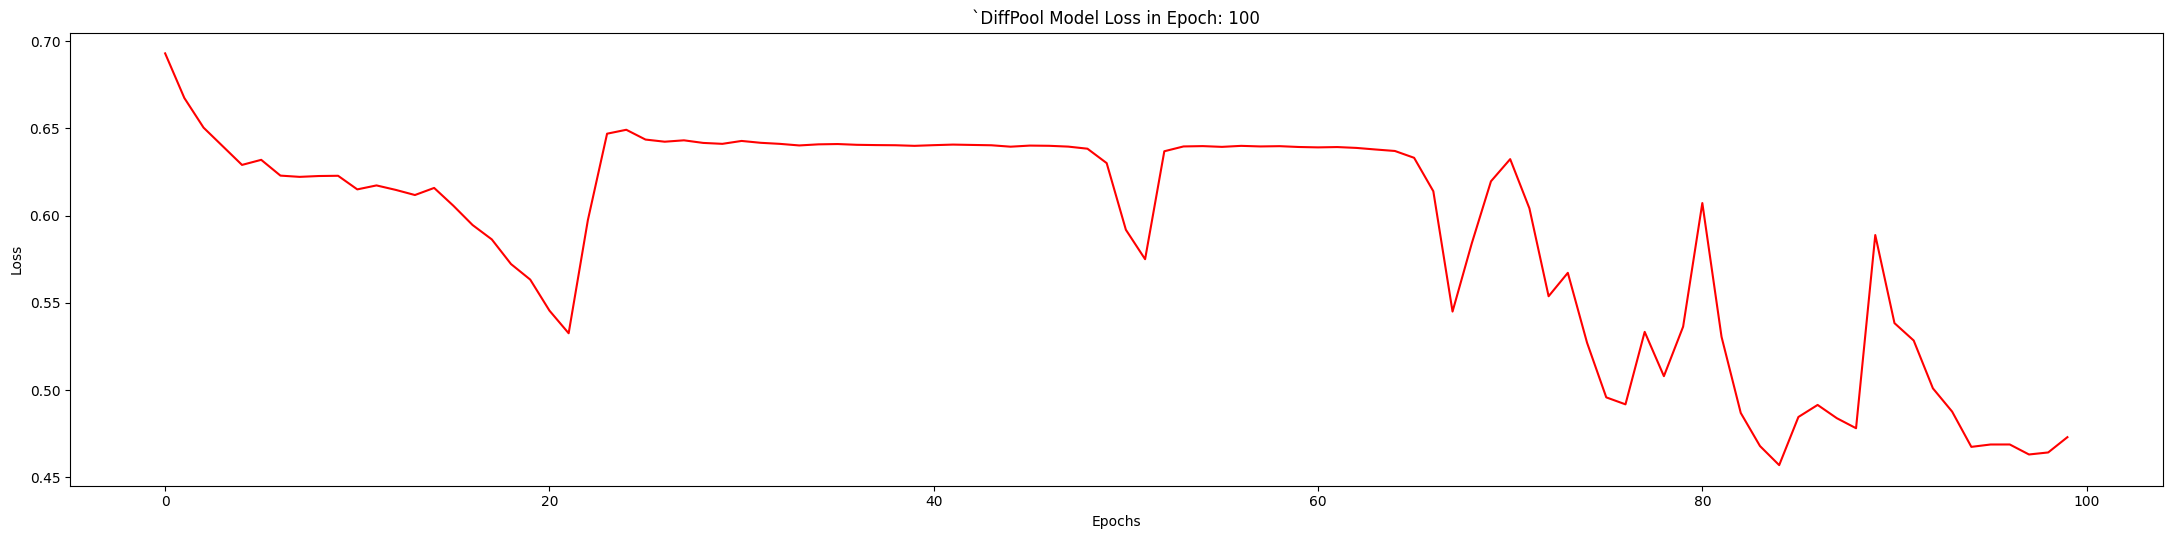

Epoch: 101, Model Loss: 0.4895
Epoch: 102, Model Loss: 0.4974
Epoch: 103, Model Loss: 0.4785
Epoch: 104, Model Loss: 0.5040
Epoch: 105, Model Loss: 0.4678
Epoch: 106, Model Loss: 0.4978
Epoch: 107, Model Loss: 0.4852
Epoch: 108, Model Loss: 0.4536
Epoch: 109, Model Loss: 0.4480
Epoch: 110, Model Loss: 0.4573
Epoch: 111, Model Loss: 0.4592
Epoch: 112, Model Loss: 0.4496
Epoch: 113, Model Loss: 0.4481
Epoch: 114, Model Loss: 0.4814
Epoch: 115, Model Loss: 0.4731
Epoch: 116, Model Loss: 0.4618
Epoch: 117, Model Loss: 0.4407
Epoch: 118, Model Loss: 0.4393
Epoch: 119, Model Loss: 0.4324
Epoch: 120, Model Loss: 0.4439
Epoch: 121, Model Loss: 0.4615
Epoch: 122, Model Loss: 0.4544
Epoch: 123, Model Loss: 0.4709
Epoch: 124, Model Loss: 0.4558
Epoch: 125, Model Loss: 0.4684
Epoch: 126, Model Loss: 0.4416
Epoch: 127, Model Loss: 0.4303
Epoch: 128, Model Loss: 0.4383
Epoch: 129, Model Loss: 0.4287
Epoch: 130, Model Loss: 0.4706
Epoch: 131, Model Loss: 0.4391
Epoch: 132, Model Loss: 0.4551
Epoch: 1

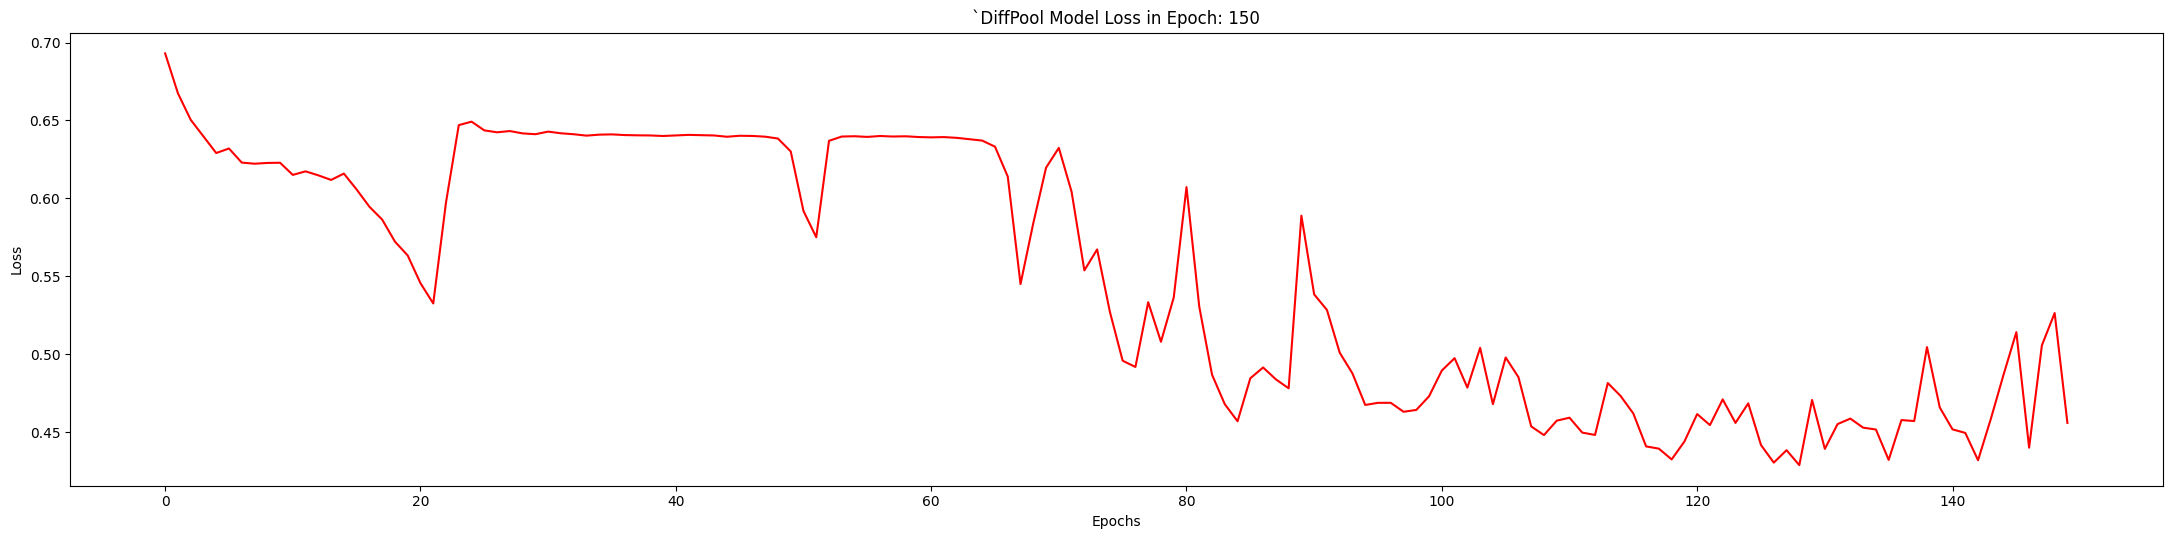

Epoch: 151, Model Loss: 0.4745
Epoch: 152, Model Loss: 0.4442
Epoch: 153, Model Loss: 0.4836
Epoch: 154, Model Loss: 0.4649
Epoch: 155, Model Loss: 0.4401
Epoch: 156, Model Loss: 0.4783
Epoch: 157, Model Loss: 0.4400
Epoch: 158, Model Loss: 0.5440
Epoch: 159, Model Loss: 0.4761
Epoch: 160, Model Loss: 0.4653
Epoch: 161, Model Loss: 0.4531
Epoch: 162, Model Loss: 0.4730
Epoch: 163, Model Loss: 0.4529
Epoch: 164, Model Loss: 0.4516
Epoch: 165, Model Loss: 0.4878
Epoch: 166, Model Loss: 0.4662
Epoch: 167, Model Loss: 0.4345
Epoch: 168, Model Loss: 0.4543
Epoch: 169, Model Loss: 0.4495
Epoch: 170, Model Loss: 0.4422
Epoch: 171, Model Loss: 0.4668
Epoch: 172, Model Loss: 0.4564
Epoch: 173, Model Loss: 0.4565
Epoch: 174, Model Loss: 0.4428
Epoch: 175, Model Loss: 0.4511
Epoch: 176, Model Loss: 0.4840
Epoch: 177, Model Loss: 0.4533
Epoch: 178, Model Loss: 0.4630
Epoch: 179, Model Loss: 0.4608
Epoch: 180, Model Loss: 0.4593
Epoch: 181, Model Loss: 0.4538
Epoch: 182, Model Loss: 0.4392
Epoch: 1

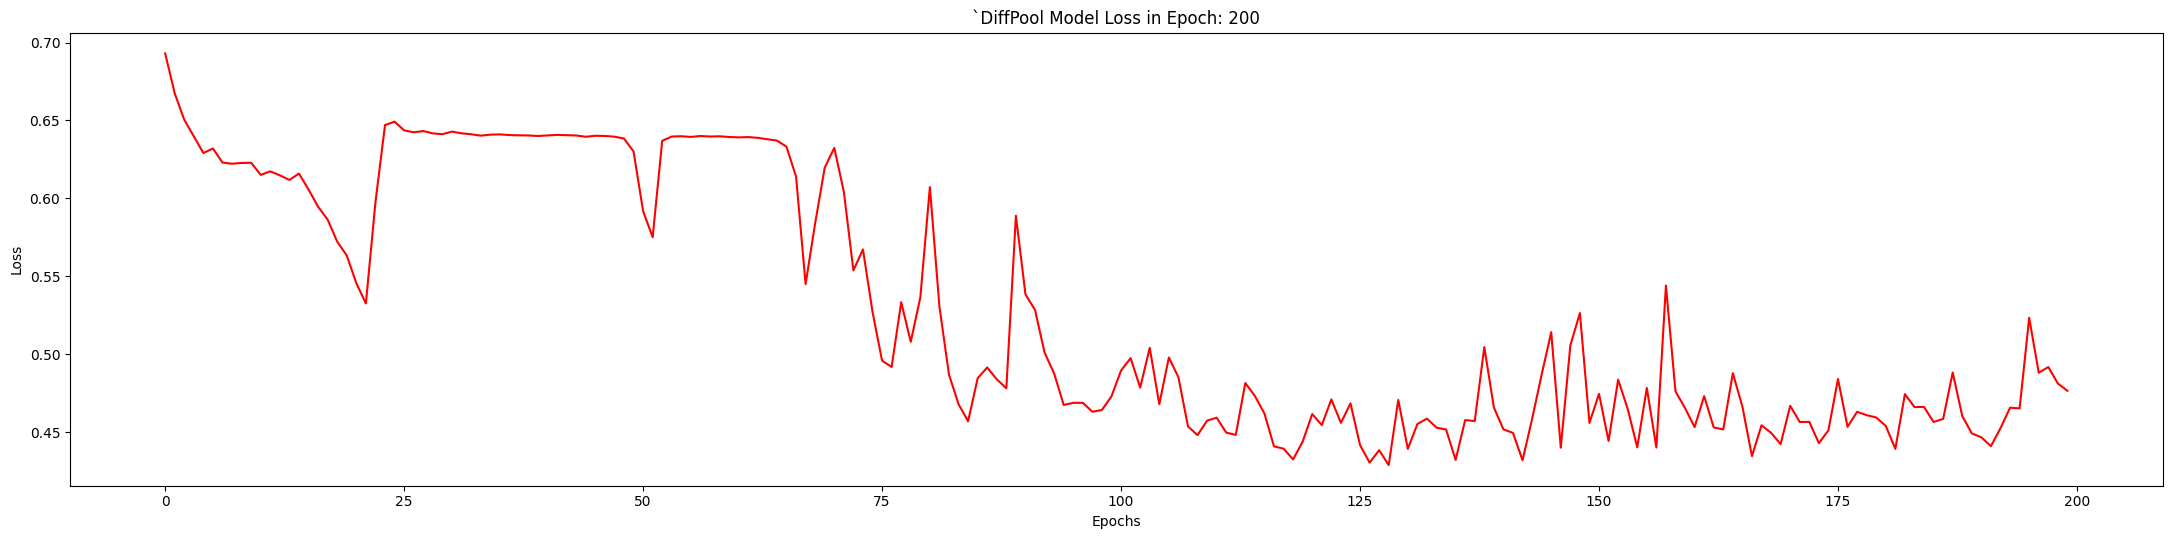

In [87]:
EPOCHS = 200
load_index = 0

train(EPOCHS, load_index)

In [ ]:
diffpool_layer_1_weights_after_training = GNN_Model.diffpool_layer_1.new_embed.embedding_layer.learnable_weights.weight
diffpool_layer_2_weights_after_training = GNN_Model.diffpool_layer_2.new_embed.embedding_layer.learnable_weights.weight
lin1_weights_after_training = GNN_Model.lin1.weight
lin2_weights_after_training = GNN_Model.lin2.weight
lin3_weights_after_training = GNN_Model.lin3.weight

In [88]:
def GNN_Model_test(test_loader):
    predictions = []
    GNN_Model.eval()

    correct = 0
    for batch_of_graphs in test_loader:
        #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        concatination_list_of_poolings, prediction_output = GNN_Model(batch_of_graphs, None)
        GNN_Model_test_pred = prediction_output.argmax(dim=1)
        predictions.extend(GNN_Model_test_pred.detach().tolist())

        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())

    return correct / len(test_dataset), predictions

In [89]:
GNN_Model_test_acc, predictions = GNN_Model_test(test_loader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.6842


In [90]:
real_labels = []
for graph in test_loader:
    real_labels.extend(graph.y.tolist())

In [91]:
print(predictions)
print(real_labels)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]


In [92]:
print(metrics.roc_auc_score(real_labels, predictions))

0.6607142857142857


In [ ]:
GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=3, embedding_hid_dim=64, embedding_output_dim=64,
                                          assignment_num_block_layers=3, assignment_hid_dim=64, assignment_output_dim=64, assignment_pred_hid_layers=[64, 64, 64],
                                          prediction_hid_layers=[7, 7], num_classes=2, Weight_Initializer=1, Bias=True,
                                          dropout_rate=0, normalize_embedding=True, normalize_assignment=True, aggregation="mean", act_fun="ReLu",
                                          concat_outputs=False, num_pooling=1)
aucroc = 0.7172619047619047
Test Accuracy: 0.7368




GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=2, embedding_hid_dim=64, embedding_output_dim=64,
                                          assignment_num_block_layers=2, assignment_hid_dim=64, assignment_output_dim=64, assignment_pred_hid_layers=[64,64],
                                          prediction_hid_layers=[7], num_classes=2, Weight_Initializer=1, Bias=True,
                                          dropout_rate=0, normalize_embedding=True, normalize_assignment=True, aggregation="mean", act_fun="ReLu",
                                          concat_outputs=False, num_pooling=1)
aucroc = 0.7380952380952381
Test Accuracy: 0.7632



GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=2, embedding_hid_dim=64, embedding_output_dim=64,
                                          assignment_num_block_layers=2, assignment_hid_dim=64, assignment_output_dim=64, assignment_pred_hid_layers=[64],
                                          prediction_hid_layers=[7], num_classes=2, Weight_Initializer=1, Bias=True,
                                          dropout_rate=0, normalize_embedding=True, normalize_assignment=True, aggregation="mean", act_fun="ReLu",
                                          concat_outputs=False, num_pooling=1)
aucroc = 0.7232142857142857
Test Accuracy: 0.7632


GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=1, embedding_hid_dim=64, embedding_output_dim=64,
                                          assignment_num_block_layers=1, assignment_hid_dim=64, assignment_output_dim=64, assignment_pred_hid_layers=[64],
                                          prediction_hid_layers=[7], num_classes=2, Weight_Initializer=1, Bias=True,
                                          dropout_rate=0, normalize_embedding=True, normalize_assignment=True, aggregation="mean", act_fun="ReLu",
                                          concat_outputs=False, num_pooling=1)
aucroc = 0.6666666666666667
Test Accuracy: 0.7105

In [ ]:
print(GNN_Model.modules)

<bound method Module.modules of DIFFPOOL_Model(
  (diffpool_layer_1): Batched_DiffPool_Layer(
    (new_embed): Batched_DiffPool_Embedding(
      (embedding_layer): GNN_Batched_GraphSage_Layer(
        (learnable_weights): Linear(in_features=14, out_features=7, bias=True)
      )
    )
    (new_assign): Batched_DiffPool_Assignment(
      (assinment_layer): GNN_Batched_GraphSage_Layer(
        (learnable_weights): Linear(in_features=14, out_features=10, bias=True)
      )
    )
  )
  (graph_sage_1): GNN_Batched_GraphSage_Layer(
    (learnable_weights): Linear(in_features=14, out_features=7, bias=True)
  )
  (diffpool_layer_2): Batched_DiffPool_Layer(
    (new_embed): Batched_DiffPool_Embedding(
      (embedding_layer): GNN_Batched_GraphSage_Layer(
        (learnable_weights): Linear(in_features=14, out_features=7, bias=True)
      )
    )
    (new_assign): Batched_DiffPool_Assignment(
      (assinment_layer): GNN_Batched_GraphSage_Layer(
        (learnable_weights): Linear(in_features=14

In [ ]:
print(GNN_Model.diffpool_layer_1)
print("============================================================================")
print(GNN_Model.graph_sage_1)
print("============================================================================")
print(GNN_Model.diffpool_layer_2)
print("============================================================================")
print(GNN_Model.graph_sage_2)
print("============================================================================")
print(GNN_Model.lin1)
print("============================================================================")
print(GNN_Model.lin2)
print("============================================================================")
print(GNN_Model.lin3)
print("============================================================================")

Batched_DiffPool_Layer(
  (new_embed): Batched_DiffPool_Embedding(
    (embedding_layer): GNN_Batched_GraphSage_Layer(
      (learnable_weights): Linear(in_features=14, out_features=7, bias=True)
    )
  )
  (new_assign): Batched_DiffPool_Assignment(
    (assinment_layer): GNN_Batched_GraphSage_Layer(
      (learnable_weights): Linear(in_features=14, out_features=10, bias=True)
    )
  )
)
GNN_Batched_GraphSage_Layer(
  (learnable_weights): Linear(in_features=14, out_features=7, bias=True)
)
Batched_DiffPool_Layer(
  (new_embed): Batched_DiffPool_Embedding(
    (embedding_layer): GNN_Batched_GraphSage_Layer(
      (learnable_weights): Linear(in_features=14, out_features=7, bias=True)
    )
  )
  (new_assign): Batched_DiffPool_Assignment(
    (assinment_layer): GNN_Batched_GraphSage_Layer(
      (learnable_weights): Linear(in_features=14, out_features=10, bias=True)
    )
  )
)
GNN_Batched_GraphSage_Layer(
  (learnable_weights): Linear(in_features=14, out_features=7, bias=True)
)
Linear

In [ ]:
print(diffpool_layer_1_weights_before_training.tolist())
print(diffpool_layer_1_weights_after_training.tolist())
if diffpool_layer_1_weights_before_training.tolist() == diffpool_layer_1_weights_after_training.tolist():
    print("diffpool_layer_1_weights, equal")
if diffpool_layer_2_weights_before_training.tolist() == diffpool_layer_2_weights_after_training.tolist():
    print("diffpool_layer_1_weights, equal")
if lin1_weights_before_training.tolist() == lin1_weights_after_training.tolist():
    print("lin1_weights, equal")
if lin2_weights_before_training.tolist() == lin2_weights_after_training.tolist():
    print("lin2_weights, equal")
if lin3_weights_before_training.tolist() == lin3_weights_after_training.tolist():
    print("lin3_weights, equal")

[[0.009919542819261551, 0.1426900029182434, 0.824820339679718, -0.6850906610488892, -0.28378307819366455, 0.5869351625442505, 0.6859486103057861, -0.008189828135073185, -0.5440734624862671, -0.5696141719818115, 0.5902376174926758, 0.5125398635864258, 0.05904967710375786, -0.31759050488471985], [-0.31269824504852295, -0.5464045405387878, 0.30431067943573, 0.2644621431827545, 0.24215134978294373, -0.4379763901233673, 0.12115300446748734, -0.2671789526939392, -0.13343499600887299, -0.4454578161239624, 0.6857748627662659, -0.42539799213409424, 0.12307330965995789, 0.4055451452732086], [-0.34960004687309265, -0.18642330169677734, 0.14954547584056854, -0.12432020902633667, 0.34387296438217163, 0.2845948338508606, 0.009904906153678894, -0.3133758008480072, -0.5112972855567932, -0.31712281703948975, 0.27958789467811584, -0.5546007752418518, 0.24074381589889526, 0.302809476852417], [0.49520447850227356, 0.6889647841453552, -0.348732054233551, 0.02580370008945465, -0.05422883480787277, 0.1262625

In [ ]:
for module in GNN_Model.modules:
    print(module)

TypeError: ignored